<a href="https://colab.research.google.com/github/Yash-Yelave/Image_Processing_Computer_Vision/blob/main/IPCV_smoothing_and_sharpning_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Smoothing filters**

* Linear Smoothing Filters


  1. Mean Filter (Average Filter)
  2. Gaussian Filter
  3. Box Filter



In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


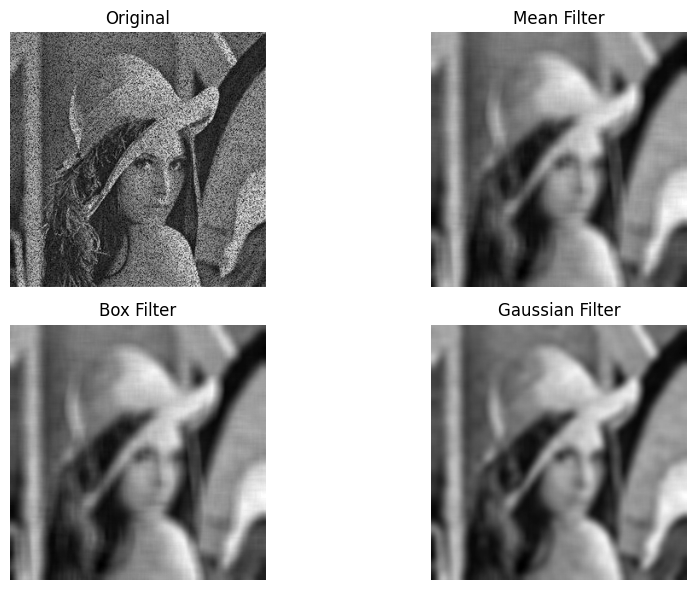

In [8]:
# Load image (grayscale for simplicity)
img = cv2.imread("/content/drive/MyDrive/Engineering/Sem5/IPCV/PR2/saltandpepperlena-300x300.jpg", cv2.IMREAD_GRAYSCALE)

mean_filter = cv2.blur(img, (15, 15))   # 15x15 kernel

# 2. Box Filter - larger kernel
box_filter = cv2.boxFilter(img, -1, (15, 15), normalize=True)

# 3. Gaussian Filter - larger kernel & sigma
gaussian_filter = cv2.GaussianBlur(img, (15, 15), 5)  # 15x15 kernel, sigma=

# Show results using matplotlib
titles = ['Original', 'Mean Filter', 'Box Filter', 'Gaussian Filter']
images = [img, mean_filter, box_filter, gaussian_filter]

plt.figure(figsize=(10,6))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

* Non-Linear Smoothing Filters

  1. Median Filter
  2. Mode Filter
  3. Bilateral Filter

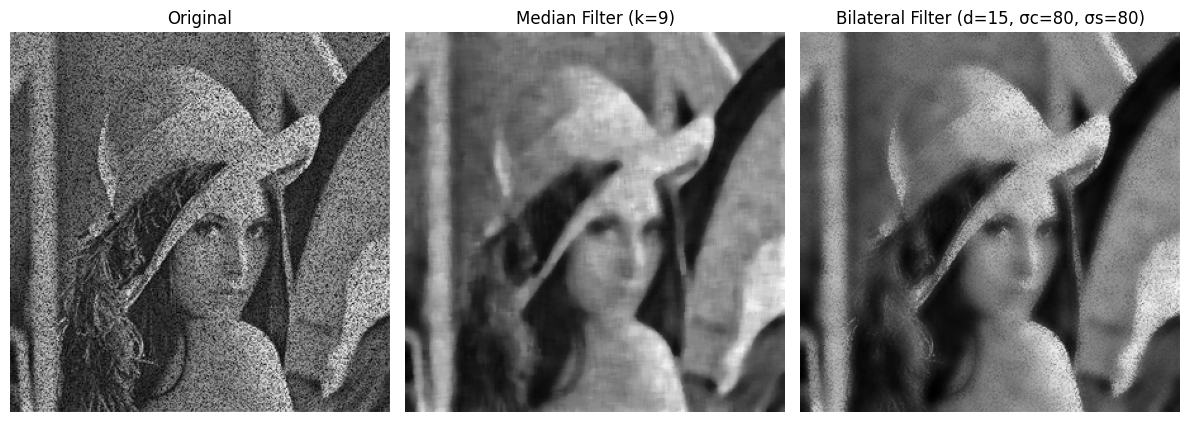

In [9]:
median_filter = cv2.medianBlur(img, 9)   # kernel size 9

# 2. Bilateral Filter - smooths while preserving edges
bilateral_filter = cv2.bilateralFilter(img, d=15, sigmaColor=80, sigmaSpace=80)

# Show results using matplotlib
titles = ['Original', 'Median Filter (k=9)', 'Bilateral Filter (d=15, σc=80, σs=80)']
images = [img, median_filter, bilateral_filter]

plt.figure(figsize=(12, 6))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

* Edge-Preserving and Adaptive Filters

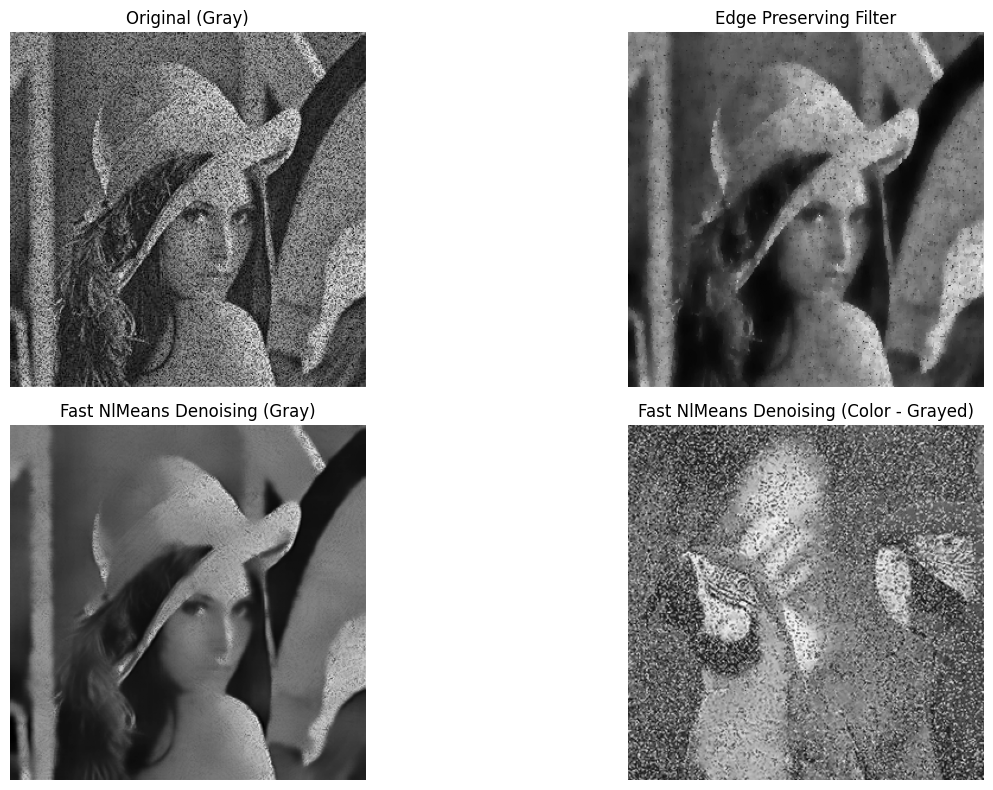

In [23]:

img = cv2.imread("/content/drive/MyDrive/Engineering/Sem5/IPCV/PR2/saltandpepperlena-300x300.jpg", cv2.IMREAD_GRAYSCALE)

img_color = cv2.imread("/content/drive/MyDrive/Engineering/Sem5/IPCV/PR2/Image_1.jpg")

# 1. Edge Preserving Filter (already demonstrated, but including for completeness)
edge_preserving = cv2.edgePreservingFilter(img, flags=1, sigma_s=60, sigma_r=0.4)

# 2. Fast Non-local Means Denoising (for grayscale images)
fast_nl_means = cv2.fastNlMeansDenoising(img, None, 30, 7, 21)

# 3. Fast Non-local Means Denoising Colored (for color images)
fast_nl_means_color = cv2.fastNlMeansDenoisingColored(img_color, None, 10, 10, 7, 21)

# Convert the color denoised image to grayscale for plotting alongside others
fast_nl_means_color_gray = cv2.cvtColor(fast_nl_means_color, cv2.COLOR_BGR2GRAY)


titles = ['Original (Gray)', 'Edge Preserving Filter', 'Fast NlMeans Denoising (Gray)', 'Fast NlMeans Denoising (Color - Grayed)']
images = [img, edge_preserving, fast_nl_means, fast_nl_means_color_gray]

plt.figure(figsize=(15, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

* Frequency Domain Filters

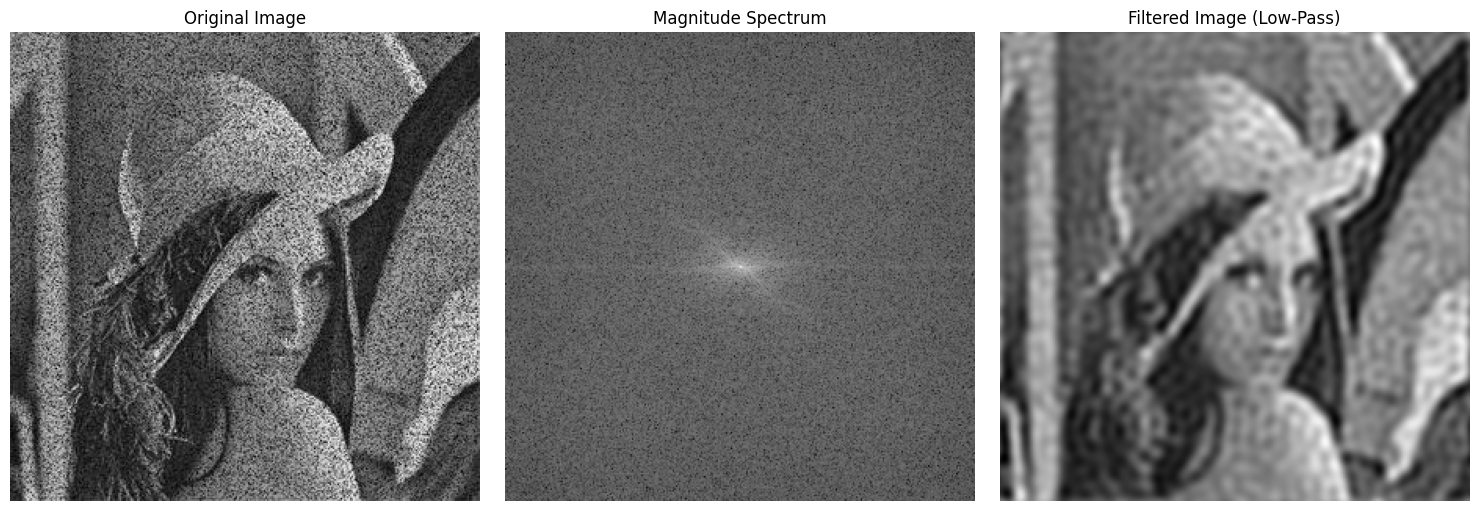

In [25]:
# Frequency Domain Filters

# Load the image (grayscale is common for frequency domain analysis)
img_freq = cv2.imread("/content/drive/MyDrive/Engineering/Sem5/IPCV/PR2/saltandpepperlena-300x300.jpg", cv2.IMREAD_GRAYSCALE)

# Perform FFT to get the frequency domain representation
# The output will be a 2D complex array
dft = cv2.dft(np.float32(img_freq), flags=cv2.DFT_COMPLEX_OUTPUT)

# Shift the zero-frequency component to the center of the spectrum
dft_shift = np.fft.fftshift(dft)

# Calculate the magnitude spectrum for visualization
# This gives a visual representation of the frequencies present in the image
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

# Now, apply a filter in the frequency domain
# For example, let's create a simple ideal Low-Pass Filter (LPF)
rows, cols = img_freq.shape
crow, ccol = int(rows / 2), int(cols / 2)  # Center of the spectrum

# Create a mask for the filter
mask = np.zeros((rows, cols, 2), np.uint8)
r = 30  # Radius of the filter (determines the cutoff frequency)
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 1

# Apply the mask to the shifted spectrum
fshift = dft_shift * mask

# Shift the zero-frequency component back for the inverse FFT
f_ishift = np.fft.ifftshift(fshift)

# Perform inverse FFT to get the filtered image back in the spatial domain
img_back = cv2.idft(f_ishift, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT)
img_back = np.clip(img_back, 0, 255).astype(np.uint8) # Clip values and convert back to uint8

# Show results
titles = ['Original Image', 'Magnitude Spectrum', 'Filtered Image (Low-Pass)']
images = [img_freq, magnitude_spectrum, img_back]

plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()